In [12]:
# . fitness function ----

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi in zip(abs(x)):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xi[0]) ** 2
            # print('output:{} real:{}'.format(output[0],xi[0]))


# . neat run ----

def run(config_file, n = None):
    # load configuration
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                       neat.DefaultSpeciesSet, neat.DefaultStagnation,
                       config_file)
    # create the population, which is the top-level object for a NEAT run
    p = neat.Population(config)
    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(True)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(1)
    p.add_reporter(checkpointer)
    # run for up to n generations
    winner = p.run(eval_genomes, n)
    return [reporter, stats, winner]

In [68]:
### ENVIRONMENT ====

### . packages ----

import os
import neat

import numpy as np
import matplotlib.pyplot as plt
import random


### . sample data ----

x = np.sin(np.arange(.01, 1000 * .01, .01))


### NEAT ALGORITHM ====

### . model evolution ----

random.seed(1899)
[reporter, stats, winner] = run('config-feedforward', n = 25)


### . prediction ----

## extract winning model
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config-feedforward')

winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: -296.49360 stdev: 140.32803
Best fitness: -13.92686 - size: (1, 1) - species 1 - id 69
Average adjusted fitness: 0.479
Mean genetic distance 1.257, standard deviation 0.567
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100    -13.9    0.479     0
Total extinctions: 0
Generation time: 0.705 sec
Saving checkpoint to neat-checkpoint-0

 ****** Running generation 1 ****** 

Population's average fitness: -335.14929 stdev: 172.42834
Best fitness: -0.03667 - size: (1, 1) - species 1 - id 108
Average adjusted fitness: 0.292
Mean genetic distance 1.654, standard deviation 0.781
Population of 100 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    90     -0.0    0.292     0
     2    0    10       --       --     0
Total extinctions: 0
Generation time: 0.478 sec (0.591 

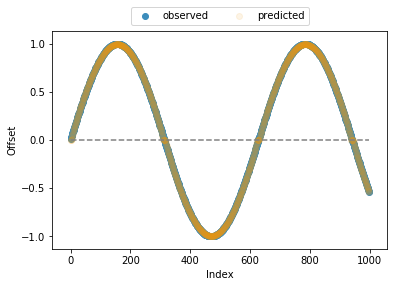

In [69]:
## make predictions
y = []
for xi in zip(abs(x)):
  y.append(winner_net.activate(xi))

## if required, adjust signs
for i in range(len(y)):
  if (x[i] < 0):
    y[i] = [x * -1 for x in y[i]]

## display sample vs. predicted data
plt.scatter(range(len(x)), x, color='#3c8dbc', label = 'observed') # blue
plt.scatter(range(len(x)), y, color='#f39c12', label = 'predicted', alpha = 0.1) # orange
plt.hlines(0, xmin = 0, xmax = len(x), colors = 'grey', linestyles = 'dashed')
plt.xlabel("Index")
plt.ylabel("Offset")
plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc = 10, ncol = 2, mode = None, borderaxespad = 0.)
plt.show()
plt.clf()

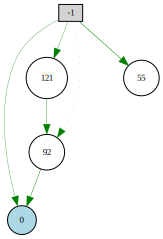

In [70]:
import visualize
visualize.draw_net(config, winner, False,fmt="png")

In [5]:
winner

In [87]:
filenames = []
for i in range(7):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    best_id = find_best_id(p)
    print(best_id,p.population[best_id].fitness)
    visualize.draw_net(config, p.population[best_id], False, filename=str(i), fmt="png")
    filenames.append(str(i)+'.png')
    plt.show()

69 -13.926861877780611
108 -0.036669409671200984
108 -0.036669409671200984
108 -0.036669409671200984
108 -0.036669409671200984
108 -0.036669409671200984
651 0.25703165499176317


In [88]:
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

In [51]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))
#print(p.population)

#winnerp = p.run(eval_genomes, 0)
#print("\nBest genome:\n{!s}".format(winnerp))

In [59]:
def find_best_id(p):
    fitness_list = [] 
    for i in p.population:
        fitness = p.population[i].fitness
        if fitness != None:
            fitness_list.append(fitness)
        else:
            fitness_list.append(float("-inf"))
    #print(len(fitness_list))
    index = fitness_list.index(max(fitness_list))
    best_id = list(p.population.keys())[index]
    return best_id

In [54]:
find_best_id(p)

100


69

0

In [21]:
print(p.population[69])

Key: 69
Fitness: -13.926861877780611
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.3075434015636279, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=0.9401166016557478, enabled=True)


None
None
None
None
None


In [99]:
print(stats.best_genome())

Key: 391
Fitness: 3.8238120765956145
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.015392585093011876, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=1.0211169825669357, enabled=True)


In [62]:
print("\nBest genome:\n{!s}".format(p.run(eval_genomes, 0)))


Best genome:
None


Mean genetic distance 1.807, standard deviation 0.603
Mean genetic distance 1.896, standard deviation 0.609
Mean genetic distance 1.887, standard deviation 0.563
Mean genetic distance 1.873, standard deviation 0.601
Mean genetic distance 1.868, standard deviation 0.622


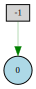

In [23]:
import visualize
visualize.draw_net(config, p.run(eval_genomes, 5), False,fmt="png")

In [75]:
def draw_net(
    config,
    genome,
    view=False,
    filename=None,
    node_names=None,
    show_disabled=True,
    prune_unused=False,
    node_colors=None,
    fmt="png",
):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        warnings.warn(
            "This display is not available due to a missing optional dependency (graphviz)"
        )
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {"shape": "circle", "fontsize": "9", "height": "0.2", "width": "0.2"}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {
            "style": "filled",
            "shape": "box",
            "fillcolor": node_colors.get(k, "lightgray"),
        }
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {"style": "filled", "fillcolor": node_colors.get(k, "lightblue")}

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {"style": "filled", "fillcolor": node_colors.get(n, "white")}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = "solid" if cg.enabled else "dotted"
            color = "green" if cg.weight > 0 else "red"
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(
                a, b, _attributes={"style": style, "color": color, "penwidth": width}
            )

    dot.render(filename, view=view)

    return dot

In [89]:
import tensorboard